# WeatherPy
----

### Analysis
* As we can expect, the weather become significantly warmer as it approaches the equator (0 deg latitude). Besides, the southern hemisphere tends to be warmer this time of year than northern hemisphere, which may be due to the tilt of the earth.
* There is no strong correlation between latitude and humidity. However, there is a big cluster of cities between -10 and 0 shows almost 100% humidity. These cities may be from the tropical rainforest area.
* There is no strong correlation between latitude and cloudiness, latitude and wind speed. However, the wind speed tends to be higher when one approaches to north and south pole.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

620

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).

In [3]:
#creat base url
base_url = 'http://api.openweathermap.org/data/2.5/weather?'
units = 'imperial'

#build partial query URL
query_url = f"{base_url}appid={api_key}&units={units}&q="

#set up lists to hold response info
new_cities = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

#Set the values to perform the API call by blocks
x = 0
set_no = 1

print("Beginning Data Retrieval")
print("---------------------------------")

for city in cities:
   
    try:
        
        x = x + 1
        
        #for every 50 records(eg. n=#51, 101), wait 60s
        if set_no != (int((x-1)/50) + 1): 
            time.sleep(60)
            #change set_no
            set_no = (int((x-1)/50) + 1) 
                
        print(f"Processing Record {x} of Set {set_no} | {city}")
        
        #get the JSON data
        response = requests.get(query_url + city).json()
        
        new_cities.append(response['name'])
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed']) 
        
    except:
         print("City not found. Skipping...")

print("---------------------------------")
print("Data Retrieval Complete")
print("---------------------------------")

Beginning Data Retrieval
---------------------------------
Processing Record 1 of Set 1 | burica
City not found. Skipping...
Processing Record 2 of Set 1 | nikolskoye
Processing Record 3 of Set 1 | ahipara
Processing Record 4 of Set 1 | severo-kurilsk
Processing Record 5 of Set 1 | lompoc
Processing Record 6 of Set 1 | saldanha
Processing Record 7 of Set 1 | tuktoyaktuk
Processing Record 8 of Set 1 | cape town
Processing Record 9 of Set 1 | lebu
Processing Record 10 of Set 1 | lavrentiya
Processing Record 11 of Set 1 | vila franca do campo
Processing Record 12 of Set 1 | bluff
Processing Record 13 of Set 1 | hermanus
Processing Record 14 of Set 1 | rikitea
Processing Record 15 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 16 of Set 1 | guerrero negro
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | hobart
Processing Record 19 of Set 1 | jamestown
Processing Record 20 of Set 1 | hunucma
Processing Record 21 of Set 1 | zyryanka
Processin

Processing Record 183 of Set 4 | victoria
Processing Record 184 of Set 4 | pisco
Processing Record 185 of Set 4 | mahasamund
Processing Record 186 of Set 4 | mitzic
Processing Record 187 of Set 4 | margate
Processing Record 188 of Set 4 | punta alta
Processing Record 189 of Set 4 | syasstroy
Processing Record 190 of Set 4 | hamilton
Processing Record 191 of Set 4 | mentok
City not found. Skipping...
Processing Record 192 of Set 4 | mandalgovi
Processing Record 193 of Set 4 | tuatapere
Processing Record 194 of Set 4 | kyabe
Processing Record 195 of Set 4 | pimentel
Processing Record 196 of Set 4 | petropavlovka
Processing Record 197 of Set 4 | abonnema
Processing Record 198 of Set 4 | puerto ayora
Processing Record 199 of Set 4 | auki
Processing Record 200 of Set 4 | narsaq
Processing Record 201 of Set 5 | omboue
Processing Record 202 of Set 5 | ligayan
Processing Record 203 of Set 5 | geraldton
Processing Record 204 of Set 5 | magan
Processing Record 205 of Set 5 | dawei
Processing Rec

Processing Record 367 of Set 8 | elizabeth city
Processing Record 368 of Set 8 | show low
Processing Record 369 of Set 8 | leua
Processing Record 370 of Set 8 | cabedelo
Processing Record 371 of Set 8 | sri aman
Processing Record 372 of Set 8 | rocha
Processing Record 373 of Set 8 | oga
Processing Record 374 of Set 8 | viedma
Processing Record 375 of Set 8 | orje
Processing Record 376 of Set 8 | saleaula
City not found. Skipping...
Processing Record 377 of Set 8 | raudeberg
Processing Record 378 of Set 8 | billings
Processing Record 379 of Set 8 | maniitsoq
Processing Record 380 of Set 8 | livingston
Processing Record 381 of Set 8 | henties bay
Processing Record 382 of Set 8 | amapa
Processing Record 383 of Set 8 | waipawa
Processing Record 384 of Set 8 | kasangulu
Processing Record 385 of Set 8 | hornepayne
Processing Record 386 of Set 8 | yuanping
Processing Record 387 of Set 8 | pochutla
Processing Record 388 of Set 8 | beba
Processing Record 389 of Set 8 | umm kaddadah
Processing R

Processing Record 550 of Set 11 | tiznit
Processing Record 551 of Set 12 | fairbanks
Processing Record 552 of Set 12 | newport
Processing Record 553 of Set 12 | kaduna
Processing Record 554 of Set 12 | eureka
Processing Record 555 of Set 12 | khash
Processing Record 556 of Set 12 | moche
Processing Record 557 of Set 12 | laela
Processing Record 558 of Set 12 | bristol
Processing Record 559 of Set 12 | sironj
Processing Record 560 of Set 12 | tual
Processing Record 561 of Set 12 | mayfield
Processing Record 562 of Set 12 | fort nelson
Processing Record 563 of Set 12 | ixtapa
Processing Record 564 of Set 12 | torbat-e jam
Processing Record 565 of Set 12 | labuhan
Processing Record 566 of Set 12 | cranendonck
Processing Record 567 of Set 12 | yerbogachen
Processing Record 568 of Set 12 | nalut
Processing Record 569 of Set 12 | mirnyy
Processing Record 570 of Set 12 | manoel urbano
Processing Record 571 of Set 12 | chardara
City not found. Skipping...
Processing Record 572 of Set 12 | tara

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
weather_df = pd.DataFrame({'Cities':new_cities,'Cloudiness':cloudiness,'Country':country,'Date':date,
                          'Humidity':humidity,'Lat':lat,'Lng':lng,'Max Temp':max_temp,'Wind Speed':wind_speed})

weather_df.count()

Cities        563
Cloudiness    563
Country       563
Date          563
Humidity      563
Lat           563
Lng           563
Max Temp      563
Wind Speed    563
dtype: int64

In [5]:
weather_df.head()

,Cities,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Nikolskoye,90,RU,1553558276,93,59.70,30.79,33.01,8.95
1,Ahipara,56,NZ,1553558344,72,-35.17,173.16,73.02,15.01
2,Severo-Kurilsk,44,RU,1553558344,100,50.68,156.12,28.56,20.04
3,Lompoc,20,US,1553558286,51,34.64,-120.46,66.99,8.05
4,Saldanha,0,PT,1553558345,40,41.42,-6.55,47.10,15.23


In [7]:
weather_df.to_csv(output_data_file, encoding="utf-8", header=True)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

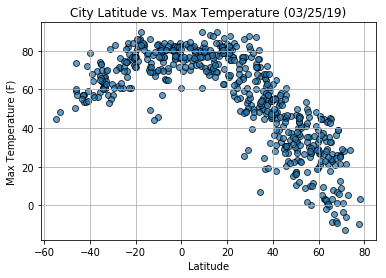

In [8]:
#Get time and convert it from Unix time to readable date 
ts = time.localtime(weather_df.iloc[0,3])
ts_normal = time.strftime('%x', ts)

plt.scatter(lat,max_temp, edgecolors="black", alpha=0.7)
plt.title(f"City Latitude vs. Max Temperature ({ts_normal})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.savefig("output_data/lat_temp.png")
plt.show()


#### Latitude vs. Humidity Plot

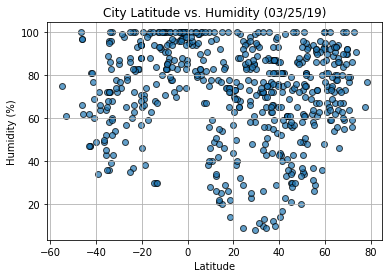

In [9]:
plt.scatter(lat,humidity, edgecolors="black", alpha=0.7)
plt.title(f"City Latitude vs. Humidity ({ts_normal})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.savefig("output_data/lat_humidity.png")
plt.show()


#### Latitude vs. Cloudiness Plot

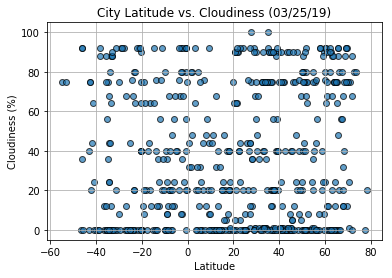

In [10]:
plt.scatter(lat,cloudiness, edgecolors="black", alpha=0.7)
plt.title(f"City Latitude vs. Cloudiness ({ts_normal})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.savefig("output_data/lat_cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

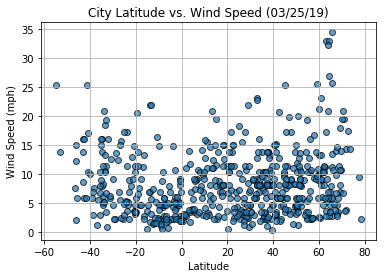

In [11]:
plt.scatter(lat,wind_speed, edgecolors="black", alpha=0.7)
plt.title(f"City Latitude vs. Wind Speed ({ts_normal})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.savefig("output_data/lat_wind_speed.png")
plt.show()